# Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler

#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate

#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
import random
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from  tensorflow.keras.optimizers import SGD

#Gridsearch for hyperparameter optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Scipy functions
from scipy.stats import randint, uniform

from sklearn.neural_network import MLPRegressor

#Import Shap
import shap

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# Data loading

In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.0,0.0,450.0,0.0,0.0,0.0,...,24.3,0.0,0.0,30.0,75.93,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.0,0.0,400.0,0.0,0.0,0.0,...,24.3,0.0,0.0,60.0,64.50,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.0,0.0,350.0,0.0,0.0,0.0,...,24.3,0.0,0.0,100.0,49.23,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.0,0.0,300.0,0.0,0.0,0.0,...,24.3,0.0,0.0,140.0,36.00,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.0,0.0,315.0,0.0,135.0,0.0,...,24.3,0.0,0.0,40.0,62.80,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.0,39.317656,106.825528,0.00,0.000000,0.000000,0.000000,702.0000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.0,95.567020,146.591457,0.00,0.000000,0.000000,210.000000,547.0000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.0,147.092807,152.375401,0.00,0.000000,155.000000,280.000000,660.0000
Class C Fly ash content (kg/m^3),1988.0,6.120221,28.791545,0.00,0.000000,0.000000,0.000000,225.0000
Class F Fly ash content (kg/m^3),1988.0,35.497918,65.744896,0.00,0.000000,0.000000,56.500000,544.0000
Slag content (kg/m^3),1988.0,34.629970,73.837709,0.00,0.000000,0.000000,0.000000,440.0000
Silica fume content (kg/m^3),1988.0,7.592819,21.082168,0.00,0.000000,0.000000,0.000000,150.0000
Water content (kg/m^3),1988.0,172.241112,28.371606,105.00,153.000000,170.000000,186.000000,295.0000
Superplasticizer content (kg/m^3),1988.0,2.335606,4.726357,0.00,0.000000,0.000000,2.702500,35.1000


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Number                                                                1988
Data source                                                              0
Selected                                                              1794
Mix number in literature                                                 0
ASTM type 1 ordinary Portland Cement content (kg/m^3)                    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)                    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)                    0
Class C Fly ash content (kg/m^3)                                         0
Class F Fly ash content (kg/m^3)                                         0
Slag content (kg/m^3)                                                    0
Silica fume content (kg/m^3)                                             0
Water content (kg/m^3)                                                   0
Superplasticizer content (kg/m^3)                                        0
Maximum coarse aggregate 

In [7]:
Excess_col_indices =[0] + list(range(2, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
0,2. Yunusa 2014,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,...,Submerged,20.0,100.0,3.0,30.0,75.93,NaN,NaN,3.139,NaN
1,2. Yunusa 2014,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,...,Submerged,20.0,100.0,3.0,60.0,64.50,NaN,NaN,4.022,NaN
2,2. Yunusa 2014,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,...,Submerged,20.0,100.0,3.0,100.0,49.23,NaN,NaN,6.670,NaN
3,2. Yunusa 2014,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,...,Submerged,20.0,100.0,3.0,140.0,36.00,NaN,NaN,7.945,NaN
4,2. Yunusa 2014,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,...,Submerged,20.0,100.0,3.0,40.0,62.80,NaN,NaN,6.052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,"J48. Farahani, 2015",350.0,0.0,0.0,0.0,0.0,0.0,50.0,180.0,2.00,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,1.550,NaN,150*150*150
1984,"J48. Farahani, 2015",380.0,0.0,0.0,0.0,0.0,0.0,20.0,200.0,0.80,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,3.375,NaN,150*150*150
1985,"J48. Farahani, 2015",370.0,0.0,0.0,0.0,0.0,0.0,30.0,200.0,1.20,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,1.000,NaN,150*150*150
1986,"J48. Farahani, 2015",360.0,0.0,0.0,0.0,0.0,0.0,40.0,200.0,1.80,...,Submerged,21.0,100.0,28.0,NaN,NaN,NaN,0.500,NaN,150*150*150


# Feature Engineering

## Quick fix on the compressive strength

In [8]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

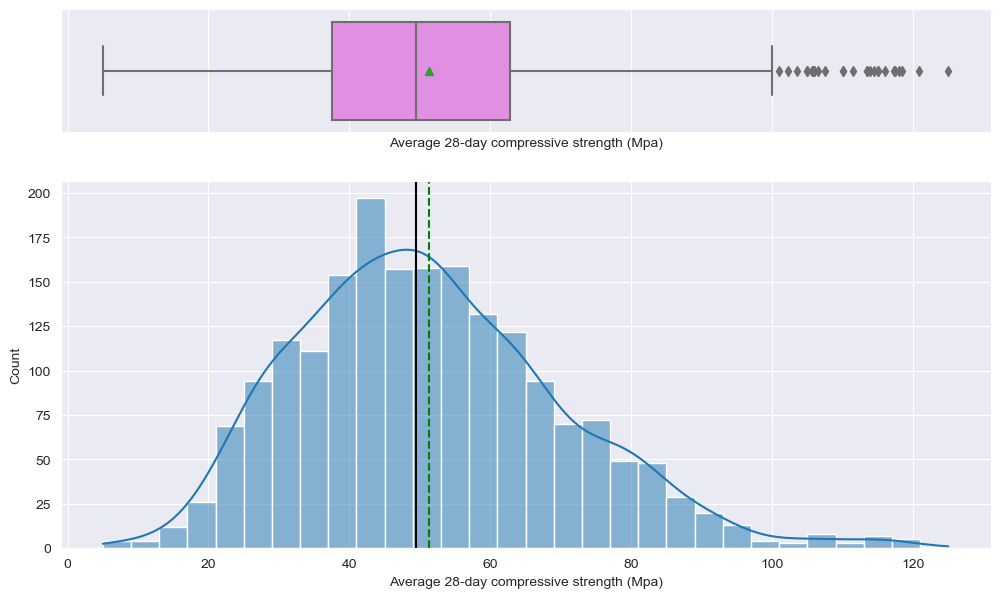

In [9]:
# Quick fix 

filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

## Curing method 

In [10]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

In [11]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Data source':
1. Vu 2019            405
2. Yunusa 2014        144
J20. Atiş, 2005        96
J18. Cengiz 2006       90
20 Lollini 2021        72
                     ... 
11 Sundar 2017          4
22 Zhao 2021            4
J6. Li 1997             4
J30. Siddique 2004      4
J9. Li 2002             3
Name: Data source, Length: 71, dtype: int64

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


In [12]:
semi_df['Curing method'].isnull().sum()

8

In [13]:
missing = semi_df['Curing method'].isnull()
semi_df[missing]

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Curing method,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size
1946,"J45. Kayali, 2012",0.0,450.0,0.0,0.0,0.0,0.0,0.0,171.0,5.130,...,NaN,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN
1947,"J45. Kayali, 2012",0.0,405.0,0.0,0.0,0.0,0.0,45.0,171.0,5.850,...,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN
1948,"J45. Kayali, 2012",0.0,337.5,0.0,0.0,0.0,112.5,0.0,171.0,5.850,...,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
1949,"J45. Kayali, 2012",0.0,292.5,0.0,0.0,0.0,112.5,45.0,171.0,5.895,...,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN
1950,"J45. Kayali, 2012",0.0,225.0,0.0,0.0,0.0,225.0,0.0,171.0,5.400,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
1951,"J45. Kayali, 2012",0.0,180.0,0.0,0.0,0.0,225.0,45.0,171.0,5.850,...,NaN,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN
1952,"J45. Kayali, 2012",0.0,135.0,0.0,0.0,0.0,315.0,0.0,171.0,4.230,...,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN
1953,"J45. Kayali, 2012",0.0,90.0,0.0,0.0,0.0,315.0,45.0,171.0,5.850,...,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN


In [14]:
semi_df = semi_df.dropna(subset=['Curing method'])
semi_df['Curing method'].isnull().sum()

0

In [15]:
new_df = semi_df.copy()
new_df = pd.concat([semi_df, pd.get_dummies(semi_df['Curing method'])], axis=1)
new_df.head()

,Data source,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),...,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Air,Moist,Sealed,Submerged
0,2. Yunusa 2014,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,...,30.0,75.93,NaN,NaN,3.139,NaN,0,0,0,1
1,2. Yunusa 2014,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,...,60.0,64.50,NaN,NaN,4.022,NaN,0,0,0,1
2,2. Yunusa 2014,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,...,100.0,49.23,NaN,NaN,6.670,NaN,0,0,0,1
3,2. Yunusa 2014,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,...,140.0,36.00,NaN,NaN,7.945,NaN,0,0,0,1
4,2. Yunusa 2014,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,...,40.0,62.80,NaN,NaN,6.052,NaN,0,0,0,1


## Data preparation

In [16]:
new_df = new_df.drop(['Curing humidity (%)', 'Curing day','Average carbonation coefficient (mm/year^0.5)', 'Slump (mm)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Average 28-day compressive strength (Mpa)', 'Curing method', 'Specimen size'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data source                                            1980 non-null   object 
 1   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 4   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 6   Slag content (kg/m^3)                                  1980 non-null   float64
 7   Silica fume content (kg/m^3)                           1980 non-null   float64
 8   Water content (kg/m^3)                          

## Drop na

In [17]:
new_df_drop = new_df.dropna()
new_df_drop.isnull().sum()

Data source                                              0
ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing temperature (Celsius degree)                      0
Average 28-day split strength (Mpa)                      0
Air                                                      0
Moist                                                   

In [18]:
new_df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),57.0,167.657895,177.561915,0.00,0.00,180.00,340.00,500.00
CEM I 42.5N ordinary Portland Cement content (kg/m^3),57.0,47.894737,129.141905,0.00,0.00,0.00,0.00,520.00
CEM I 52.5N ordinary Portland Cement content (kg/m^3),57.0,95.036842,142.013656,0.00,0.00,0.00,237.20,474.00
Class C Fly ash content (kg/m^3),57.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Class F Fly ash content (kg/m^3),57.0,70.859649,94.408296,0.00,0.00,0.00,125.00,390.00
Slag content (kg/m^3),57.0,47.163158,89.667570,0.00,0.00,0.00,47.40,326.00
Silica fume content (kg/m^3),57.0,14.463158,25.061686,0.00,0.00,0.00,20.50,101.60
Water content (kg/m^3),57.0,173.350877,19.636420,148.00,150.00,176.00,182.00,210.00
Superplasticizer content (kg/m^3),57.0,1.613298,2.401086,0.00,0.00,0.00,3.73,7.57
Maximum coarse aggregate size (mm),57.0,16.491228,6.121166,10.00,10.00,20.00,20.00,30.00


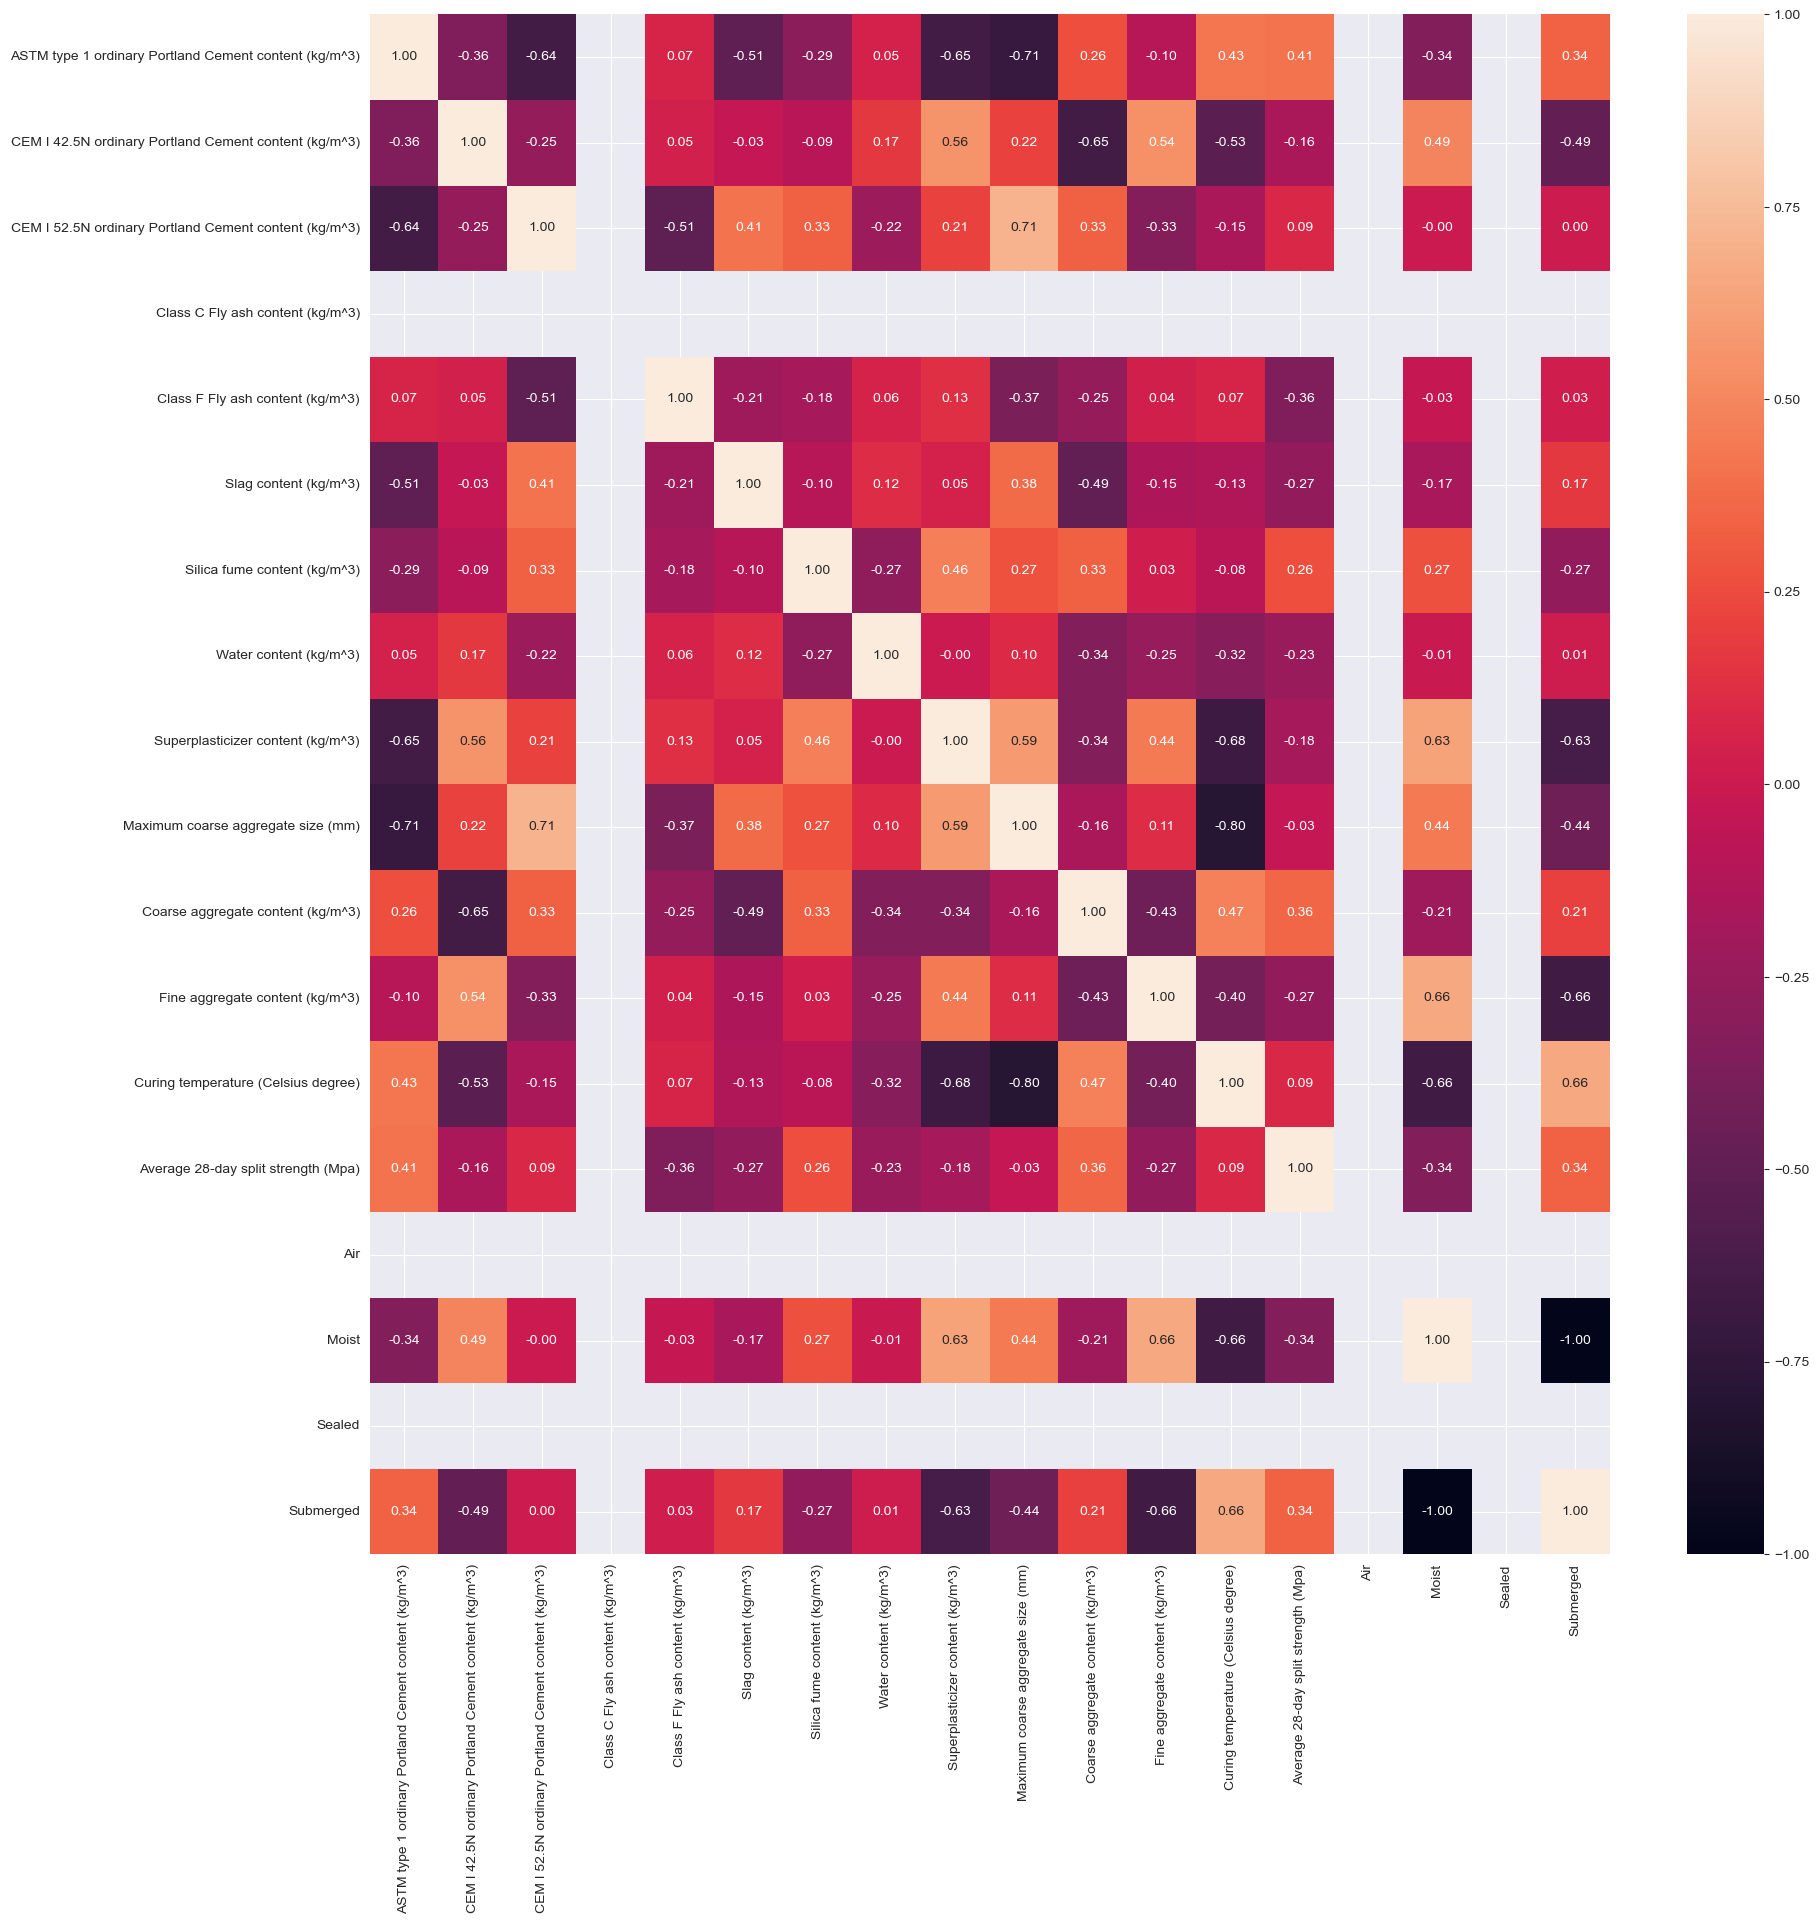

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'rocket')
plt.show()

In [20]:
new_df_drop = new_df_drop.drop(['Class C Fly ash content (kg/m^3)', 'Air', 'Sealed'], axis=1)
new_df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
ASTM type 1 ordinary Portland Cement content (kg/m^3),57.0,167.657895,177.561915,0.00,0.00,180.00,340.00,500.00
CEM I 42.5N ordinary Portland Cement content (kg/m^3),57.0,47.894737,129.141905,0.00,0.00,0.00,0.00,520.00
CEM I 52.5N ordinary Portland Cement content (kg/m^3),57.0,95.036842,142.013656,0.00,0.00,0.00,237.20,474.00
Class F Fly ash content (kg/m^3),57.0,70.859649,94.408296,0.00,0.00,0.00,125.00,390.00
Slag content (kg/m^3),57.0,47.163158,89.667570,0.00,0.00,0.00,47.40,326.00
Silica fume content (kg/m^3),57.0,14.463158,25.061686,0.00,0.00,0.00,20.50,101.60
Water content (kg/m^3),57.0,173.350877,19.636420,148.00,150.00,176.00,182.00,210.00
Superplasticizer content (kg/m^3),57.0,1.613298,2.401086,0.00,0.00,0.00,3.73,7.57
Maximum coarse aggregate size (mm),57.0,16.491228,6.121166,10.00,10.00,20.00,20.00,30.00
Coarse aggregate content (kg/m^3),57.0,1075.112281,135.767438,832.00,971.00,1086.00,1157.00,1304.00


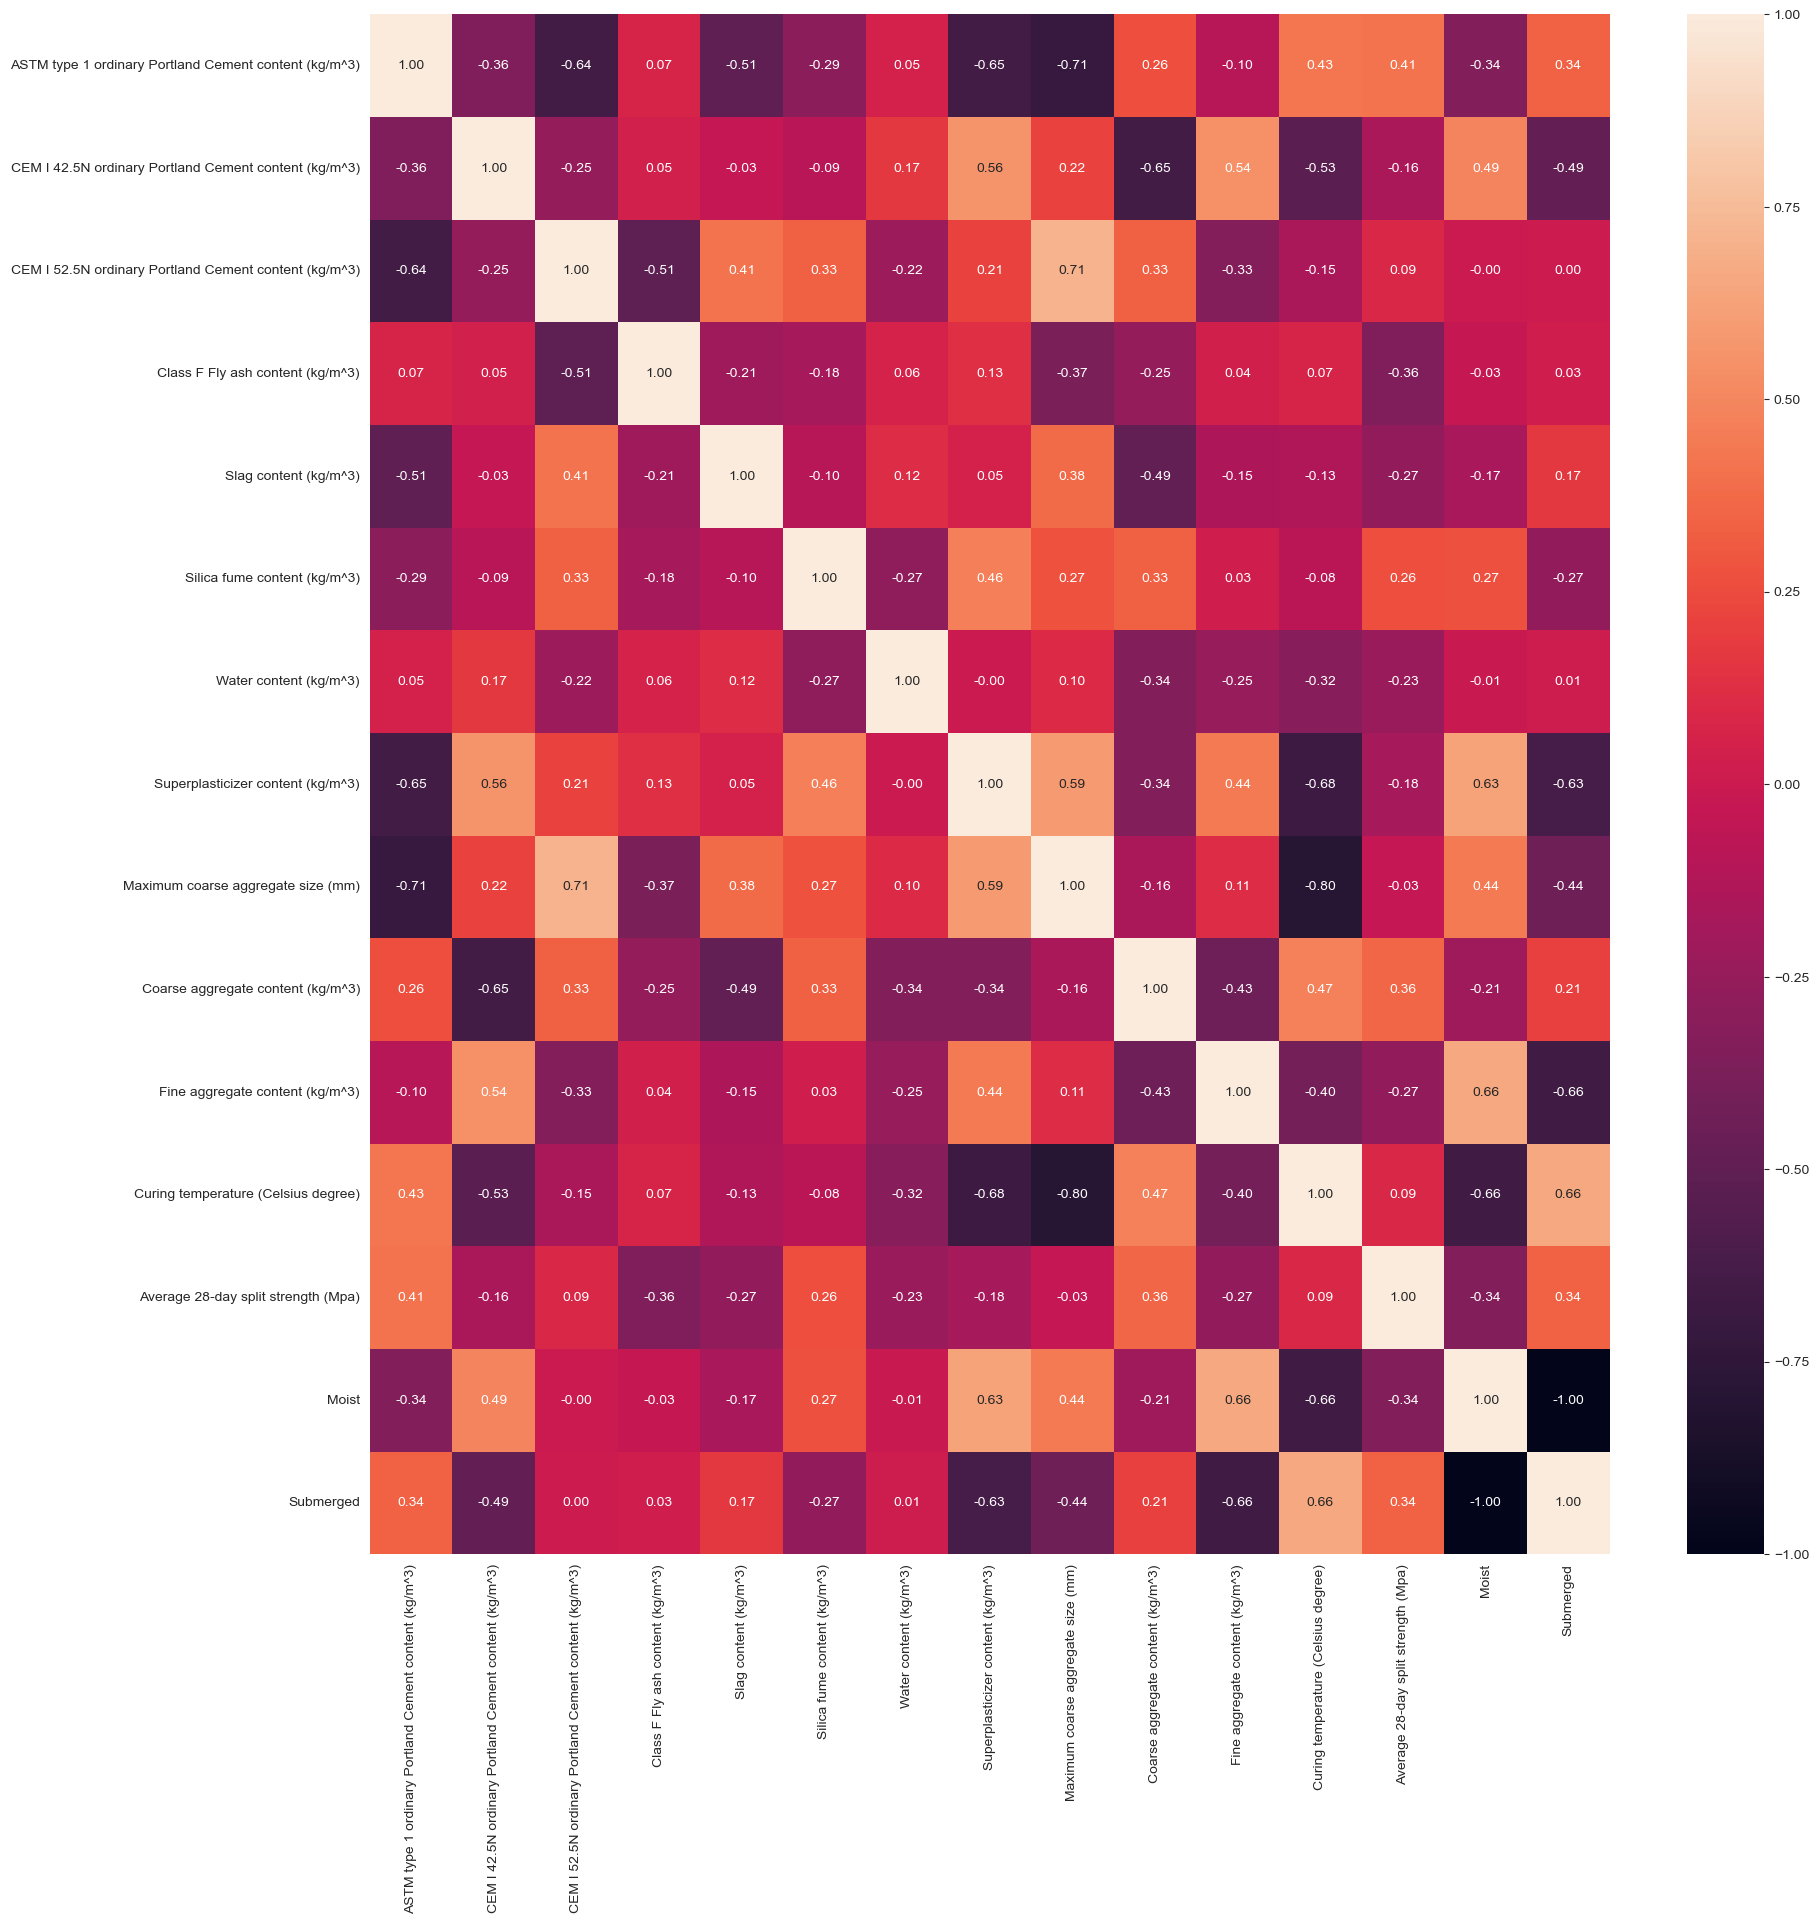

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_drop.corr(), annot = True, fmt='.2f', cmap = 'rocket')
plt.show()

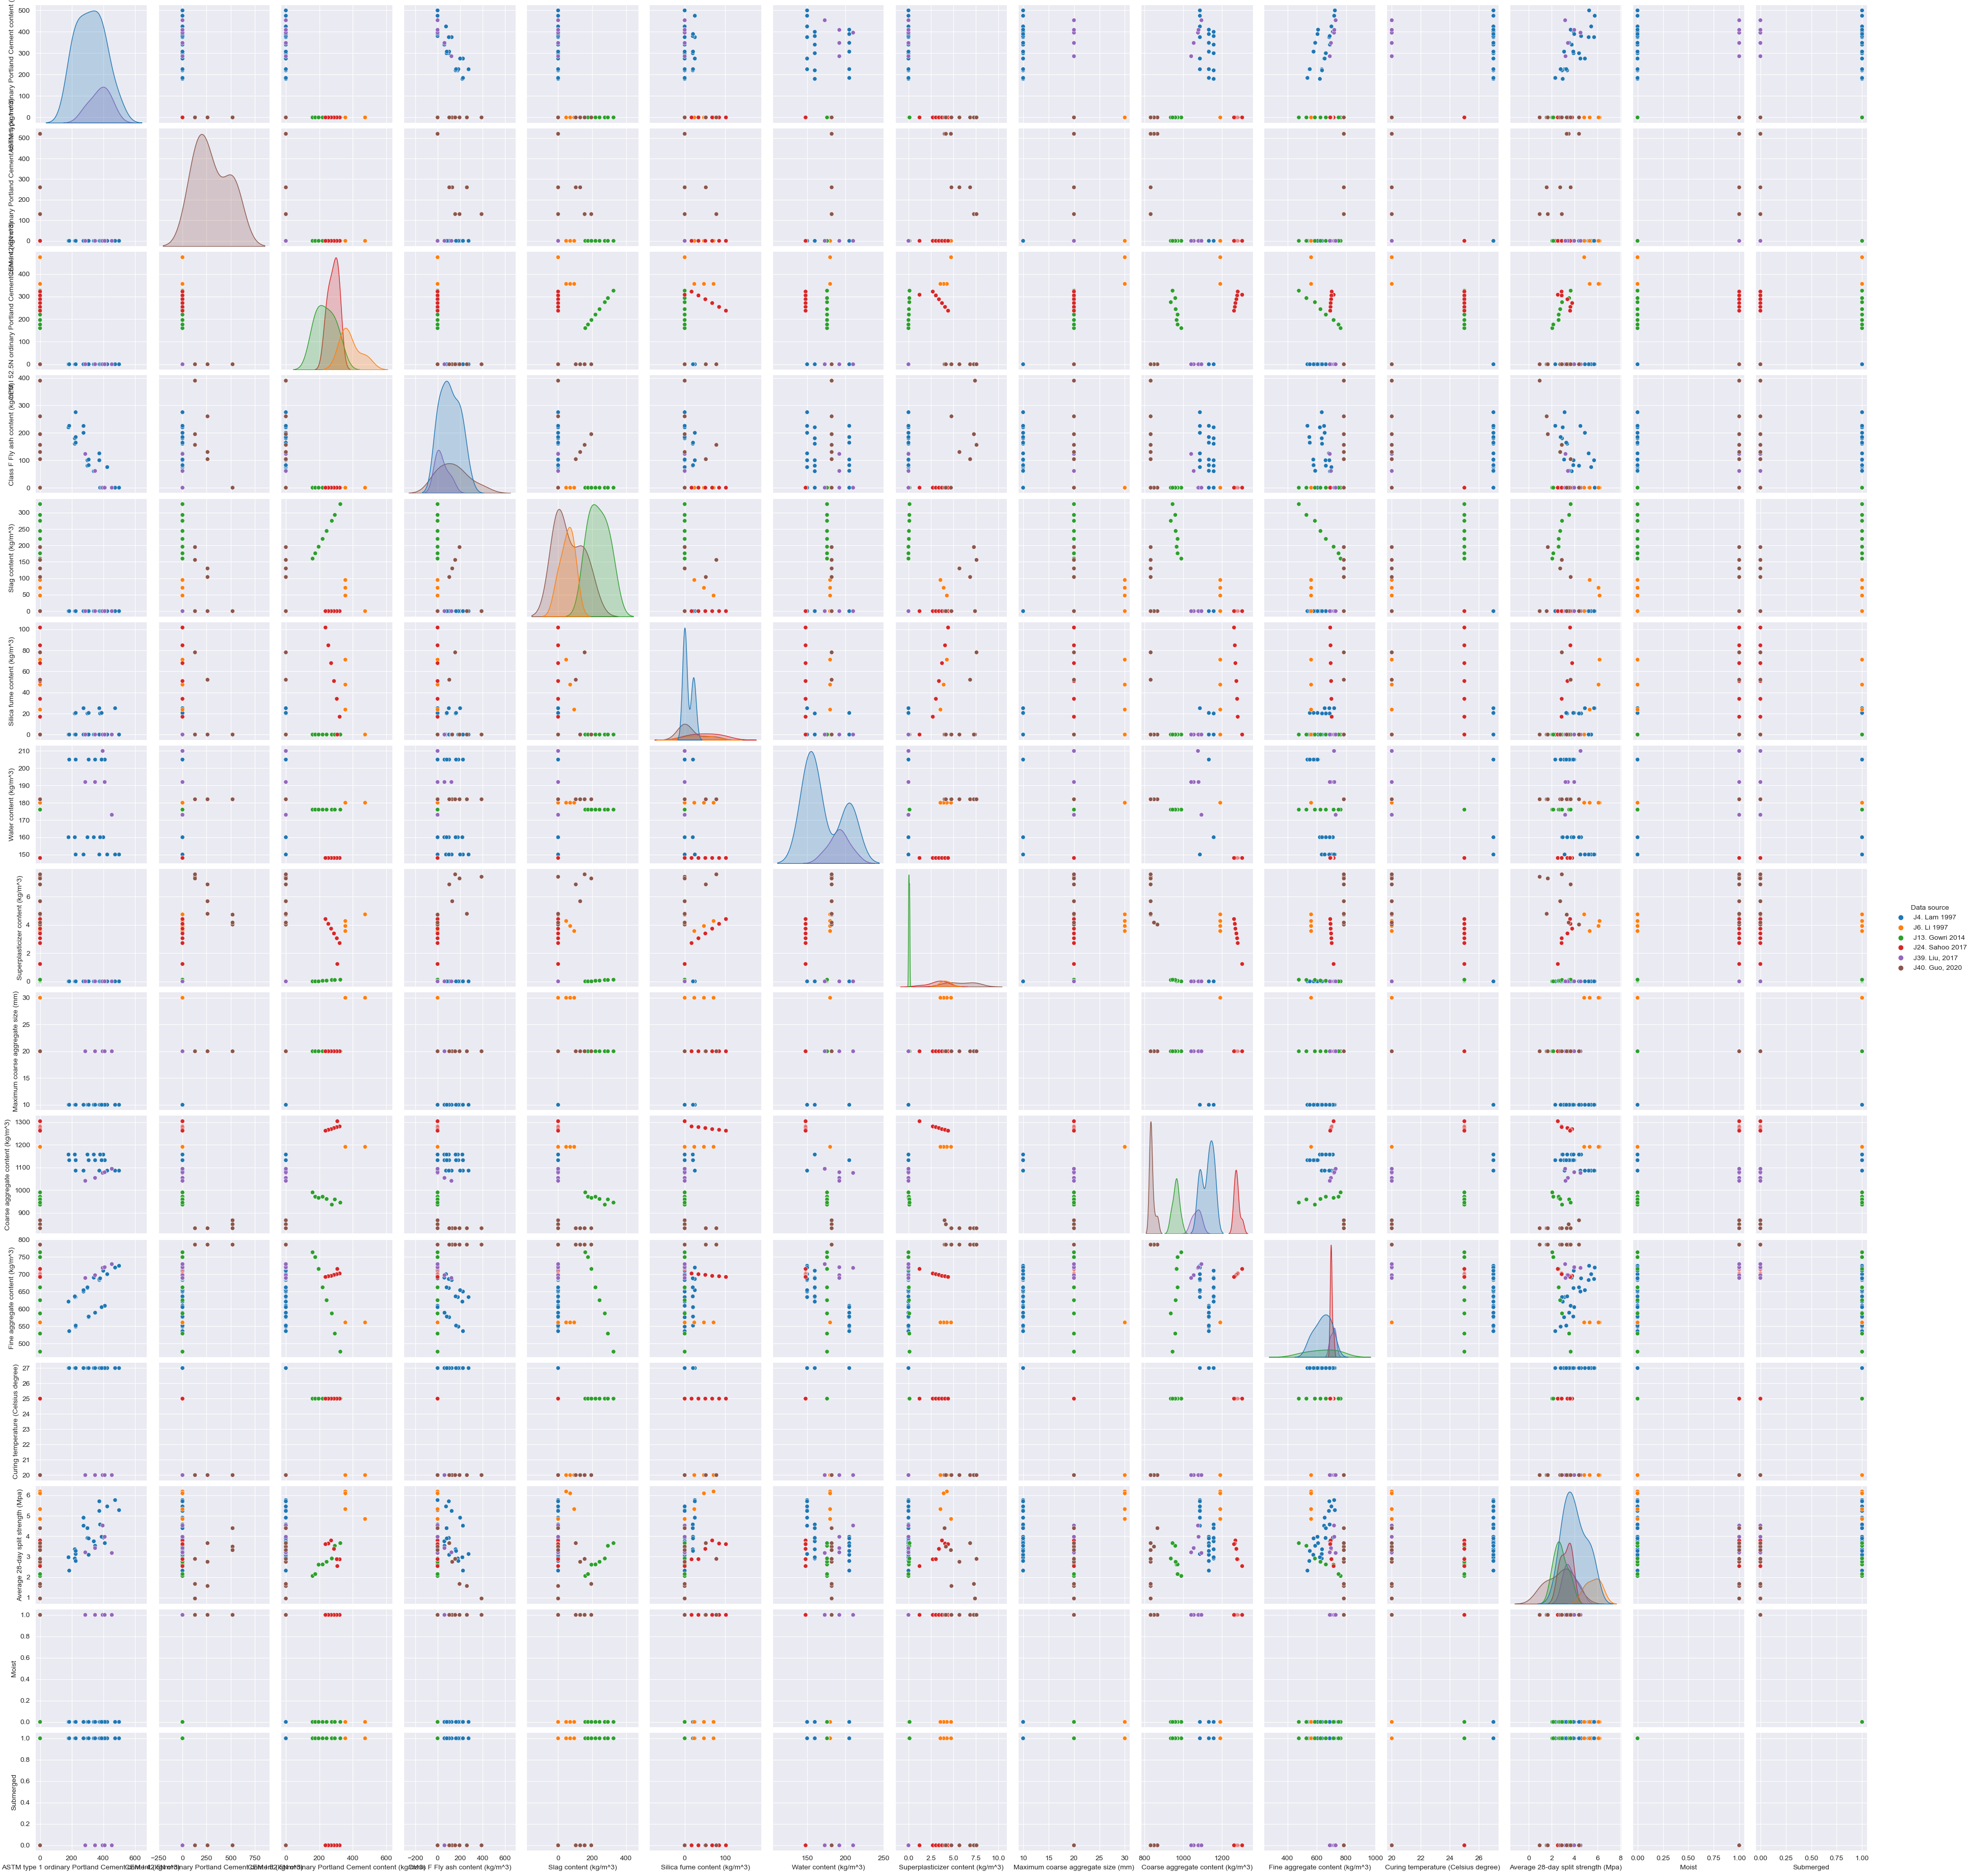

In [22]:
sns.pairplot(new_df_drop, hue= 'Data source', diag_kind= 'kde');
plt.show()

# Train-test split

In [23]:
new_df_drop = new_df_drop.drop('Data source', axis=1)
X = new_df_drop.drop(['Average 28-day split strength (Mpa)'], axis=1)
Y = new_df_drop[['Average 28-day split strength (Mpa)']]

# K fold

* 10-fold

In [24]:
kfold =KFold(n_splits=10, random_state=42, shuffle=True)

In [25]:
count = 1
for train_index, test_index in kfold.split(X,Y):
    print(f'Fold:{count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count+=1

Fold:1, Train set: 51, Test set:6
Fold:2, Train set: 51, Test set:6
Fold:3, Train set: 51, Test set:6
Fold:4, Train set: 51, Test set:6
Fold:5, Train set: 51, Test set:6
Fold:6, Train set: 51, Test set:6
Fold:7, Train set: 51, Test set:6
Fold:8, Train set: 52, Test set:5
Fold:9, Train set: 52, Test set:5
Fold:10, Train set: 52, Test set:5


# Min max scaler

In [26]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Model evaluation

* MAE, RMSE, R-square, and Adjusted R-square

In [27]:
def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adj_r2

# Model 1

In [28]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [29]:
# Initialize lists to store performance metrics
results = []  # Store performance results for each model
rmse_scores = []  # Store mean RMSE scores
mae_scores = []  # Store mean MAE scores
r2_scores = []  # Store mean R2 scores
adj_r2_scores = []  # Store mean adjusted R2 scores
fold_results = []

# Iterate over the folds
for fold_no, (train, test) in enumerate(kfold.split(X_scaled, Y), 1):
    # Define the model
    model_1 = Sequential()
    model_1.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_shape=(14,)))
    model_1.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model_1.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model_1.add(Dense(1, activation='linear'))
    model_1.compile(loss='mse', optimizer=RMSprop(learning_rate=0.001), metrics=['mae'])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model_1.fit(X_scaled[train], Y.iloc[train], validation_data=(X_scaled[test], Y.iloc[test]),
                          batch_size=64,
                          epochs=100,
                          verbose=1)
    #Store the history for each fold
    fold_results.append(history)
    
    # Perform predictions on the test set
    predictions = model_1.predict(X_scaled[test])
    
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(Y.iloc[test], predictions))
    mae = mean_absolute_error(Y.iloc[test], predictions)
    r2 = r2_score(Y.iloc[test], predictions)
    adj_r2 = adjusted_r2_score(Y.iloc[test], predictions, n_samples=X_scaled.shape[0], n_features=X_scaled.shape[1])

    # Store results
    results.append(rmse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
1/1 [==============================] - 1s 642ms/step - loss: 17.9463 - mae: 4.0809 - val_loss: 16.6016 - val_mae: 3.8311
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 13.6617 - mae: 3.5279 - val_loss: 13.6651 - val_mae: 3.4298
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 10.8799 - mae: 3.1128 - val_loss: 11.2946 - val_mae: 3.0704
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 8.6370 - mae: 2.7309 - val_loss: 9.4160 - val_mae: 2.7494
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 6.9038 - mae: 2.3979 - val_loss: 7.8812 - val_mae: 2.4506
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 5.5726 - mae: 2.1092 - val_loss: 6.5827 - val_mae: 2.2126
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 4.5034 - mae: 1.8435 - val_loss: 5.4576 - va

In [30]:
# Create a dataframe with the performance results
df_results = pd.DataFrame({
    'RMSE': rmse_scores,
    'MAE': mae_scores,
    'R2': r2_scores,
    'Adj R2': adj_r2_scores
})

df_results

,RMSE,MAE,R2,Adj R2
0,0.441805,0.330985,0.906750,0.875667
1,0.468961,0.358626,0.758544,0.678058
2,0.602257,0.514114,0.693893,0.591857
3,0.626081,0.508098,0.085163,-0.219782
4,0.521311,0.499219,0.803967,0.738622
5,0.542757,0.507198,0.795931,0.727908
6,0.538420,0.418920,0.756434,0.675245
7,0.262599,0.237183,-0.334329,-0.779106
8,0.541742,0.430530,0.634158,0.512211
9,0.612618,0.564064,0.639070,0.518760


In [31]:
# Calculate the mean of each column
mean_results = df_results.mean()

# Create a new dataframe with the mean values
df_mean_results = pd.DataFrame(mean_results, columns=['Mean'])

# Print the dataframe with the mean values
df_mean_results

,Mean
RMSE,0.515855
MAE,0.436894
R2,0.573958
Adj R2,0.431944


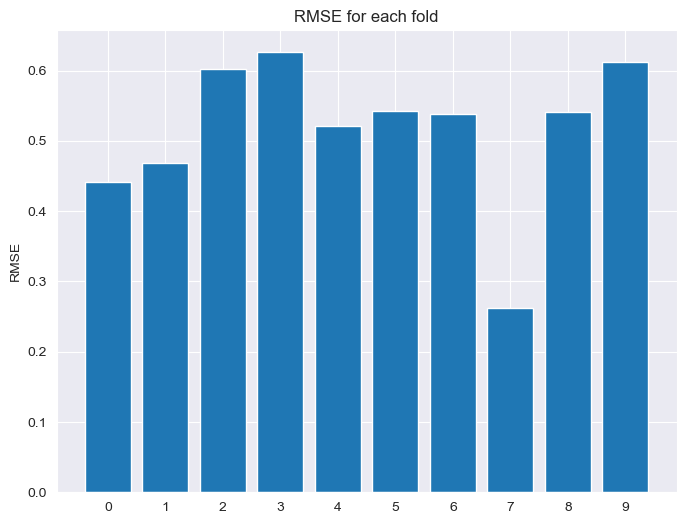

In [32]:
plt.figure(figsize=(8,6))
# Extract the RMSE values from the df_performance DataFrame
rmse_values = df_results['RMSE']

# Create a bar chart
plt.bar(range(len(rmse_values)), rmse_values)

# Set x-axis labels
plt.xticks(range(len(rmse_values)), df_results.index)

# Set y-axis label
plt.ylabel('RMSE')

# Set chart title
plt.title('RMSE for each fold')

# Display the plot
plt.show()

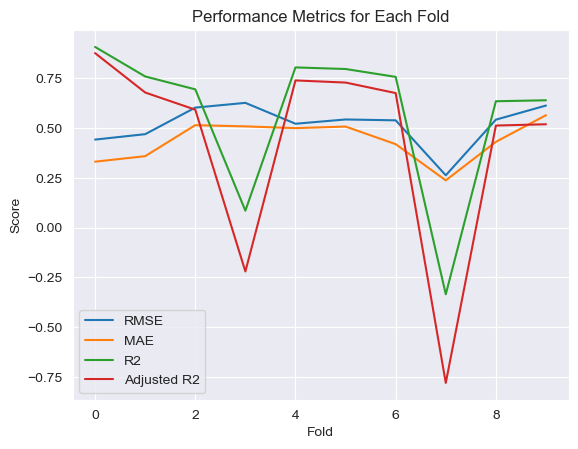

In [33]:
# Create a list of fold numbers
fold_numbers = range(10)

# Plot RMSE, MAE, R2, and adjusted R2 scores
plt.plot(fold_numbers, rmse_scores, label='RMSE')
plt.plot(fold_numbers, mae_scores, label='MAE')
plt.plot(fold_numbers, r2_scores, label='R2')
plt.plot(fold_numbers, adj_r2_scores, label='Adjusted R2')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Performance Metrics for Each Fold')
plt.legend()
plt.show()

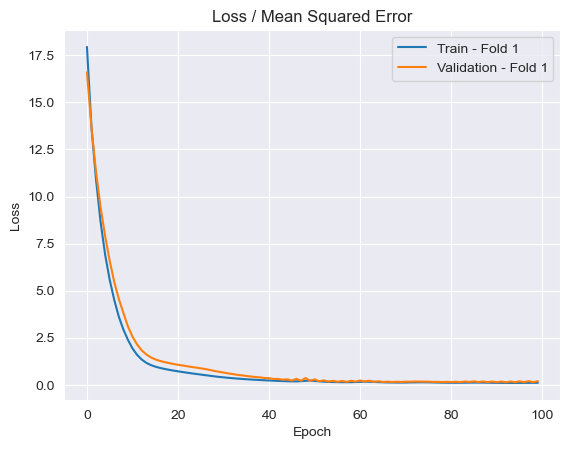

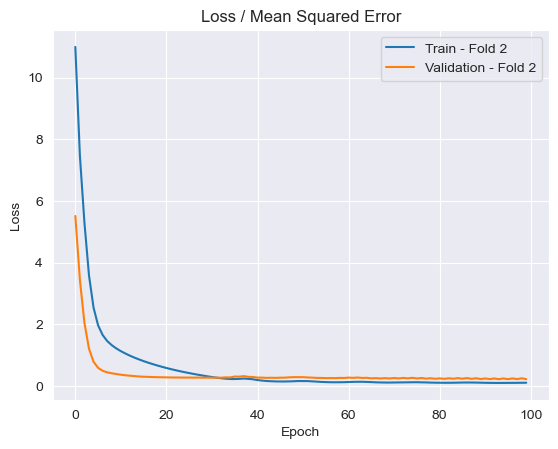

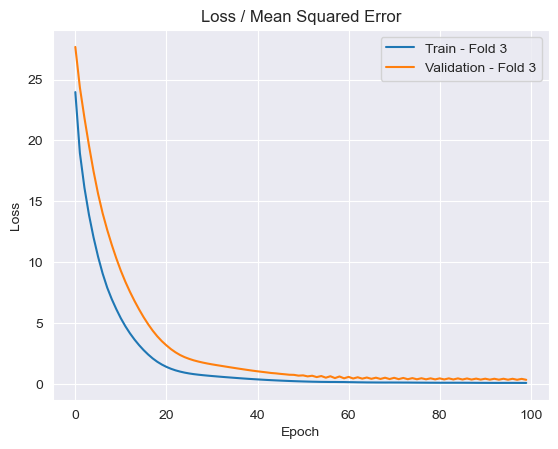

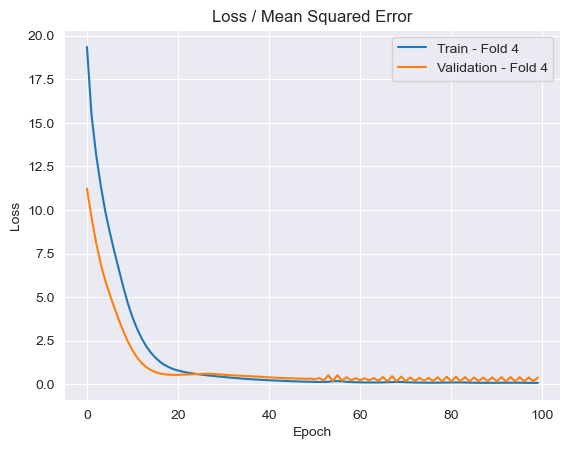

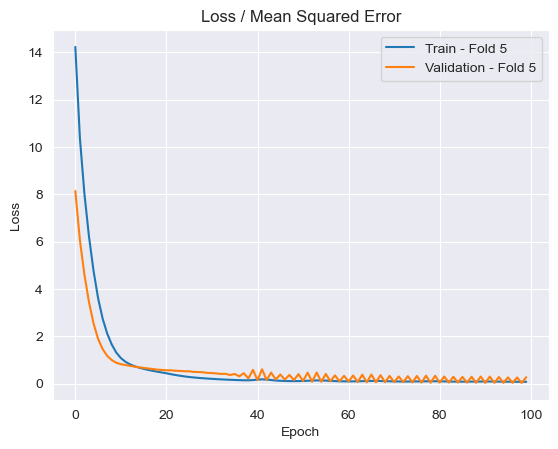

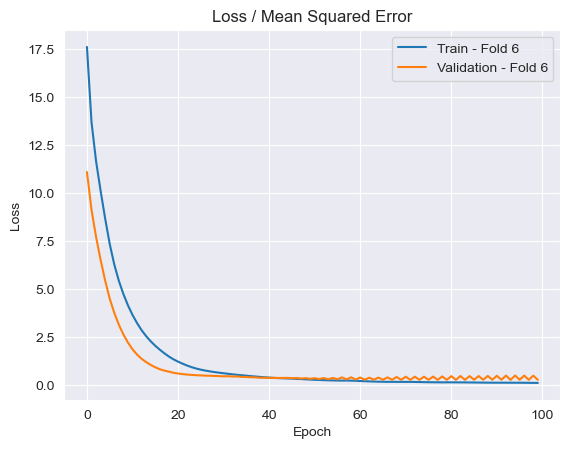

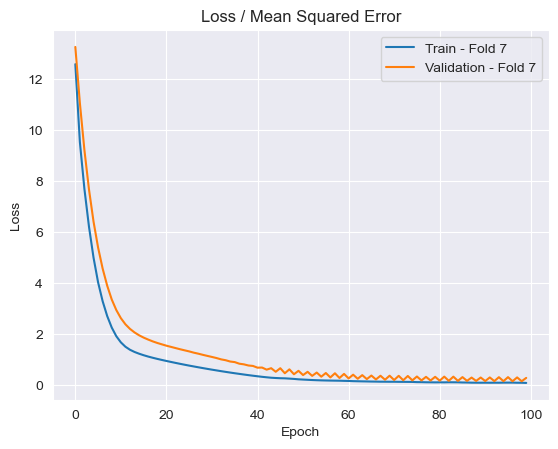

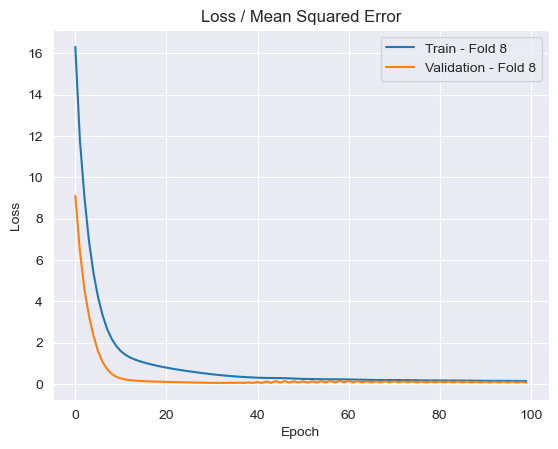

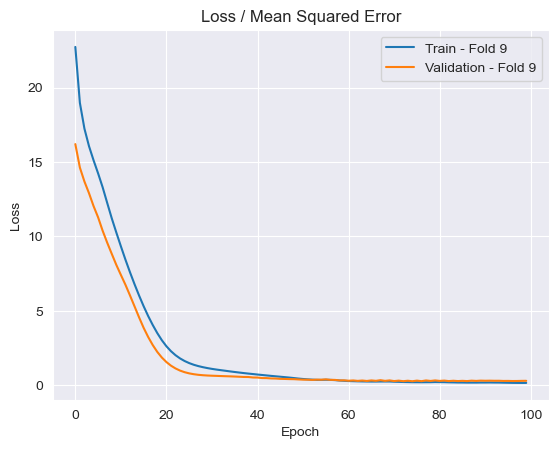

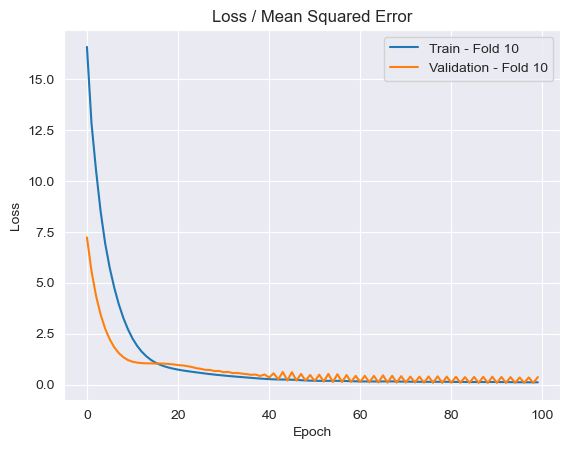

In [34]:
# Iterate over the folds
for fold, history in enumerate(fold_results, 1):
    # Plot training loss for the current fold
    plt.plot(history.history['loss'], label=f'Train - Fold {fold}')
    plt.plot(history.history['val_loss'], label = f'Validation - Fold {fold}')

    # Set plot title and labels
    plt.title('Loss / Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Display legend and show the plot
    plt.legend()
    plt.show()

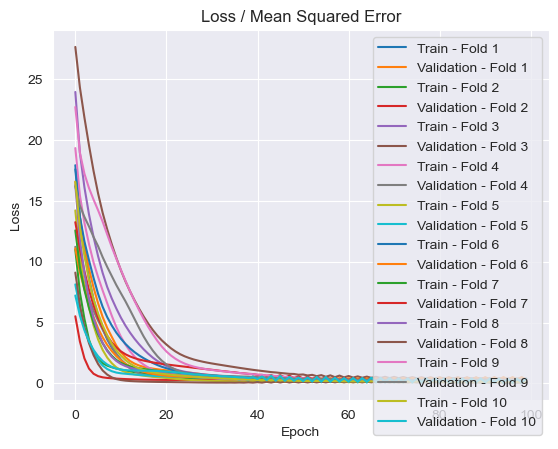

In [35]:
# Iterate over the folds
for fold, history in enumerate(fold_results, 1):
    # Plot training loss for the current fold
    plt.plot(history.history['loss'], label=f'Train - Fold {fold}')
    plt.plot(history.history['val_loss'], label = f'Validation - Fold {fold}')

# Set plot title and labels
plt.title('Loss / Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display legend and show the plot
plt.legend()
plt.show()

# Model 2 (same as model 1 but with 60 epochs only)

In [36]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [37]:
# Initialize lists to store performance metrics
results_2 = []  # Store performance results for each model
rmse_scores_2 = []  # Store mean RMSE scores
mae_scores_2 = []  # Store mean MAE scores
r2_scores_2 = []  # Store mean R2 scores
adj_r2_scores_2 = []  # Store mean adjusted R2 scores
fold_results_2 = []

In [39]:
# Iterate over the folds
for fold_no, (train, test) in enumerate(kfold.split(X_scaled, Y), 1):
    # Define the model
    model_2 = Sequential()
    model_2.add(Dense(128, activation='relu', kernel_initializer='he_uniform', input_shape=(14,)))
    model_2.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model_2.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model_2.add(Dense(1, activation='linear'))
    model_2.compile(loss='mse', optimizer=RMSprop(learning_rate=0.001), metrics=['mae'])

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model_2.fit(X_scaled[train], Y.iloc[train], validation_data=(X_scaled[test], Y.iloc[test]),
                          batch_size=64,
                          epochs=60,
                          verbose=1)
    #Store the history for each fold
    fold_results_2.append(history)

    # Perform predictions on the test set
    predictions = model_2.predict(X_scaled[test])

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(Y.iloc[test], predictions))
    mae = mean_absolute_error(Y.iloc[test], predictions)
    r2 = r2_score(Y.iloc[test], predictions)
    adj_r2 = adjusted_r2_score(Y.iloc[test], predictions, n_samples=X_scaled.shape[0], n_features=X_scaled.shape[1])

    # Store results
    results_2.append(rmse)
    rmse_scores_2.append(rmse)
    mae_scores_2.append(mae)
    r2_scores_2.append(r2)
    adj_r2_scores_2.append(adj_r2)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/60
1/1 [==============================] - 0s 424ms/step - loss: 17.9463 - mae: 4.0809 - val_loss: 16.6016 - val_mae: 3.8311
Epoch 2/60
1/1 [==============================] - 0s 22ms/step - loss: 13.6617 - mae: 3.5279 - val_loss: 13.6651 - val_mae: 3.4298
Epoch 3/60
1/1 [==============================] - 0s 29ms/step - loss: 10.8799 - mae: 3.1128 - val_loss: 11.2946 - val_mae: 3.0704
Epoch 4/60
1/1 [==============================] - 0s 27ms/step - loss: 8.6370 - mae: 2.7309 - val_loss: 9.4160 - val_mae: 2.7494
Epoch 5/60
1/1 [==============================] - 0s 30ms/step - loss: 6.9038 - mae: 2.3979 - val_loss: 7.8812 - val_mae: 2.4506
Epoch 6/60
1/1 [==============================] - 0s 24ms/step - loss: 5.5726 - mae: 2.1092 - val_loss: 6.5827 - val_mae: 2.2126
Epoch 7/60
1/1 [==============================] - 0s 24ms/step - loss: 4.5034 - mae: 1.8435 - val_loss: 5.4576 - val_mae: 

In [40]:
# Create a dataframe with the performance results
df_results_2 = pd.DataFrame({
    'RMSE': rmse_scores_2,
    'MAE': mae_scores_2,
    'R2': r2_scores_2,
    'Adj R2': adj_r2_scores_2
})

df_results_2

,RMSE,MAE,R2,Adj R2
0,0.416175,0.280346,0.917256,0.889674
1,0.509135,0.396457,0.715403,0.620537
2,0.695966,0.655985,0.591223,0.454964
3,0.595894,0.443746,0.171254,-0.104995
4,0.573818,0.534681,0.762489,0.683319
5,0.555324,0.473233,0.786371,0.715162
6,0.667974,0.584774,0.625118,0.500158
7,0.282455,0.211923,-0.543742,-1.058322
8,0.571544,0.481483,0.592799,0.457066
9,0.660351,0.595537,0.580634,0.440846


In [41]:
# Calculate the mean of each column
mean_results_2 = df_results_2.mean()

# Create a new dataframe with the mean values
df_mean_results_2 = pd.DataFrame(mean_results_2, columns=['Mean'])

# Print the dataframe with the mean values
df_mean_results_2

,Mean
RMSE,0.552864
MAE,0.465816
R2,0.519881
Adj R2,0.359841


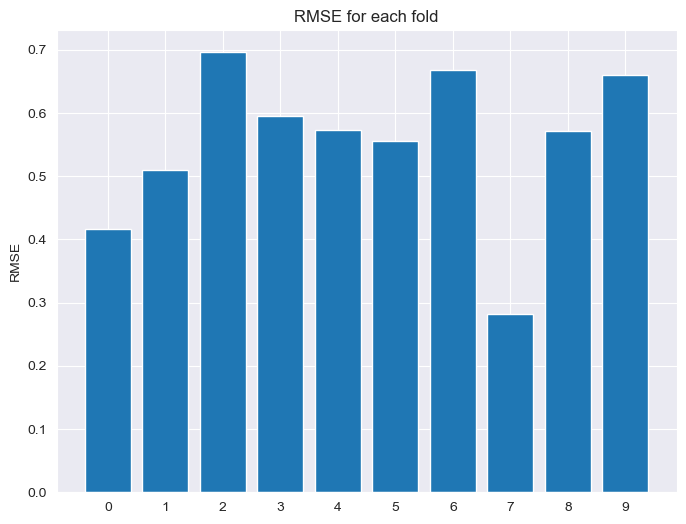

In [42]:
plt.figure(figsize=(8,6))
# Extract the RMSE values from the df_performance DataFrame
rmse_values = df_results_2['RMSE']

# Create a bar chart
plt.bar(range(len(rmse_values)), rmse_values)

# Set x-axis labels
plt.xticks(range(len(rmse_values)), df_results.index)

# Set y-axis label
plt.ylabel('RMSE')

# Set chart title
plt.title('RMSE for each fold')

# Display the plot
plt.show()

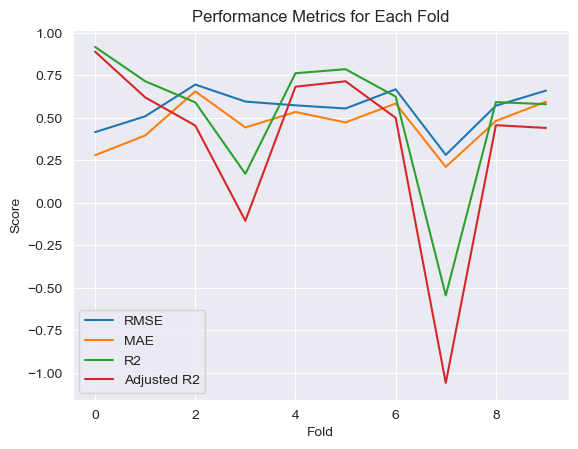

In [43]:
# Create a list of fold numbers
fold_numbers = range(10)

# Plot RMSE, MAE, R2, and adjusted R2 scores
plt.plot(fold_numbers, rmse_scores_2, label='RMSE')
plt.plot(fold_numbers, mae_scores_2, label='MAE')
plt.plot(fold_numbers, r2_scores_2, label='R2')
plt.plot(fold_numbers, adj_r2_scores_2, label='Adjusted R2')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Performance Metrics for Each Fold')
plt.legend()
plt.show()

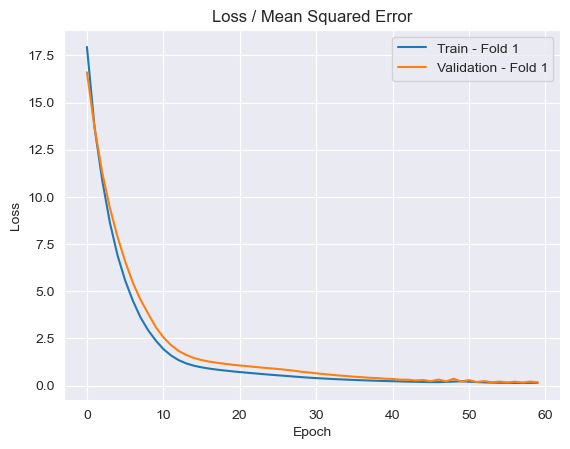

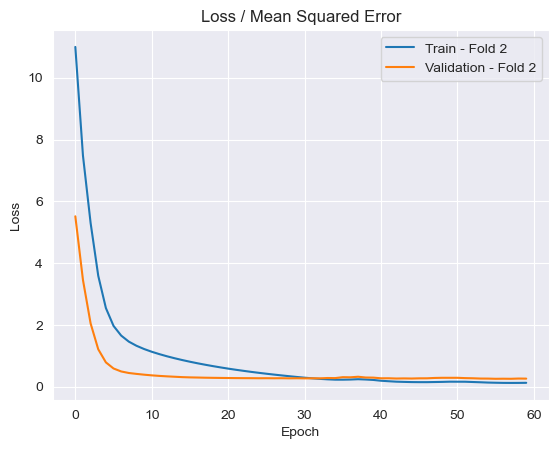

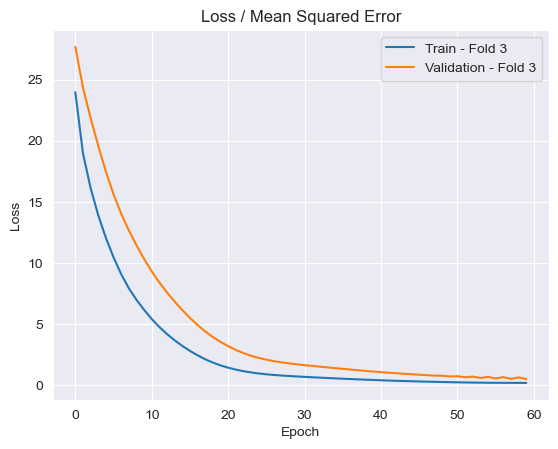

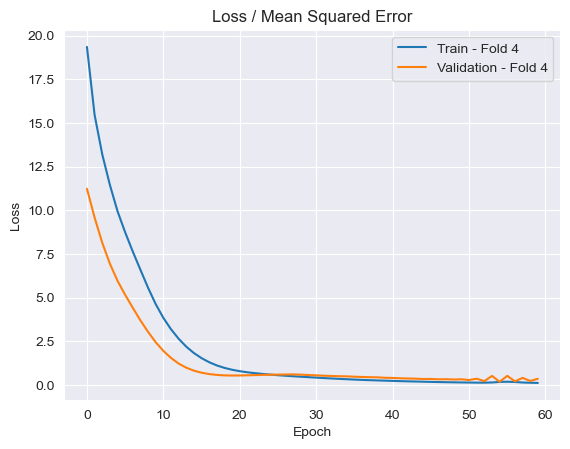

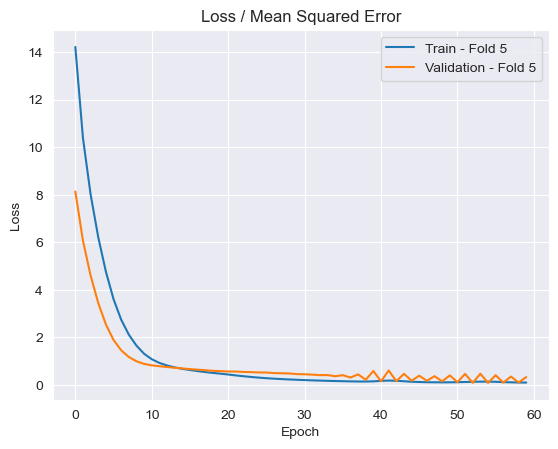

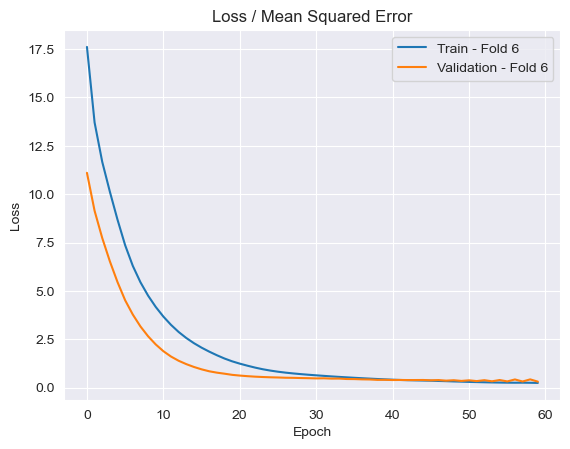

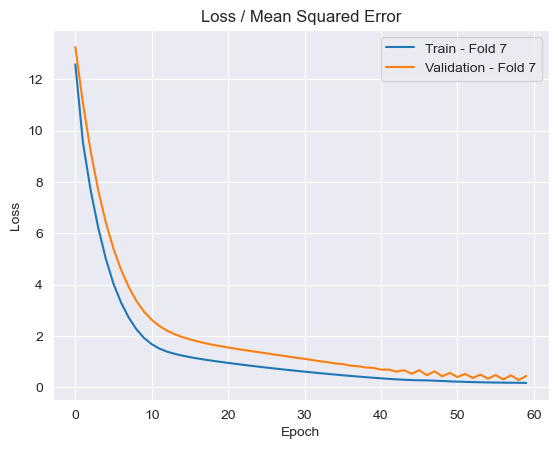

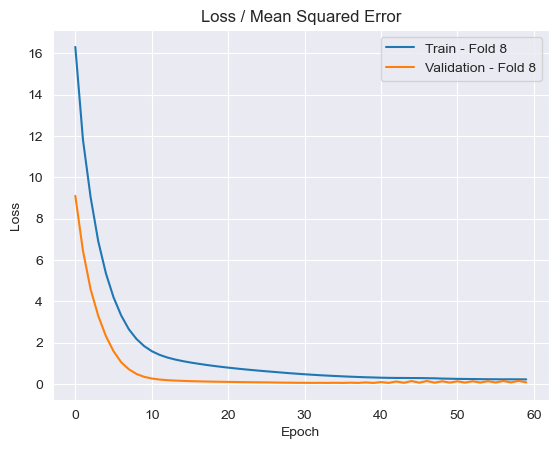

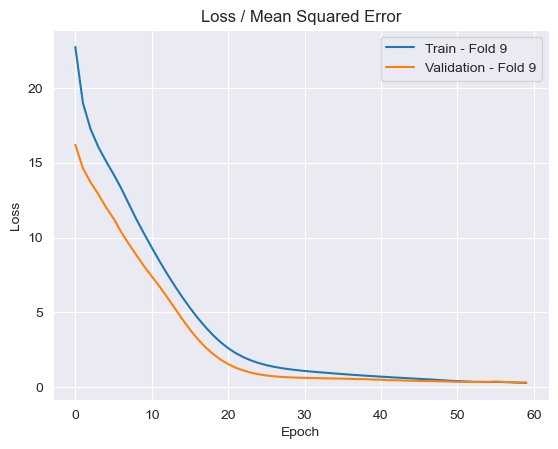

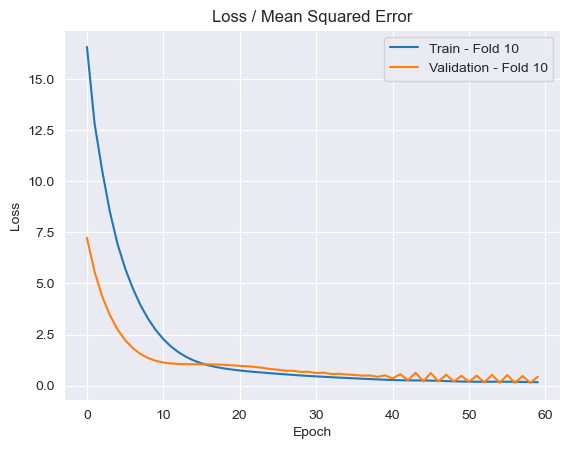

In [44]:
# Iterate over the folds
for fold, history in enumerate(fold_results_2, 1):
    # Plot training loss for the current fold
    plt.plot(history.history['loss'], label=f'Train - Fold {fold}')
    plt.plot(history.history['val_loss'], label = f'Validation - Fold {fold}')

    # Set plot title and labels
    plt.title('Loss / Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Display legend and show the plot
    plt.legend()
    plt.show()

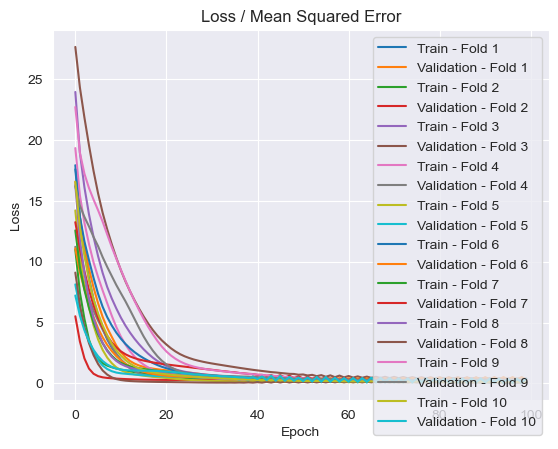

In [45]:
# Iterate over the folds
for fold, history in enumerate(fold_results, 1):
    # Plot training loss for the current fold
    plt.plot(history.history['loss'], label=f'Train - Fold {fold}')
    plt.plot(history.history['val_loss'], label = f'Validation - Fold {fold}')

# Set plot title and labels
plt.title('Loss / Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Display legend and show the plot
plt.legend()
plt.show()

# Short summary 

In [46]:
# Concatenate the dataframes horizontally
combined_df = pd.concat([df_mean_results, df_mean_results_2], axis=1)

# Print the combined dataframe
combined_df

,Mean,Mean
RMSE,0.515855,0.552864
MAE,0.436894,0.465816
R2,0.573958,0.519881
Adj R2,0.431944,0.359841


# Hyper parameter tuning

In [47]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [48]:
# Define the function to create the model
def create_model(activation, neurons, optimizer, learning_rate, dropout, batch_normalization):
    model = Sequential()
    model.add(Dense(neurons[0], activation=activation, kernel_initializer='he_uniform', input_shape=(14,)))

    if batch_normalization:
        model.add(BatchNormalization())

    if dropout > 0:
        model.add(Dropout(dropout))

    for i in range(1, len(neurons)):
        model.add(Dense(neurons[i], activation=activation, kernel_initializer='he_uniform'))

        if batch_normalization:
            model.add(BatchNormalization())

        if dropout > 0:
            model.add(Dropout(dropout))

    model.add(Dense(1, activation='linear'))

    if optimizer == 'SGD':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        opt = RMSprop(learning_rate=learning_rate)

    model.compile(loss='mse', optimizer=opt, metrics=['mae'], batch_size=64)

    return model

In [49]:
# Define the parameter distribution for random search
param_dist = {
    'activation': ['relu', 'tanh', 'sigmoid'],
    'hidden_layer_sizes': [(128, 32, 32), (64, 32, 32, 16), (128, 32, 16, 8)],
    'solver': ['sgd', 'adam', 'rmsprop'],
    'learning_rate_init': uniform(0.001),
    'batch_size':[64, 'auto', 128, None],
    'alpha': uniform(0.0001, 0.001),
    'max_iter': [100, 200],
    'early_stopping': [True, False],

}

# Create the MLPRegressor estimator
model = MLPRegressor()

# Perform random search cross-validation
random = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=50, cv=10)
random_result = random.fit(X_scaled, Y)

# Get the best hyperparameters and the corresponding performance
best_params = random_result.best_params_
best_score = np.sqrt(-random_result.best_score_)
print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

Best Parameters: {'activation': 'tanh', 'alpha': 0.00030794166286818883, 'early_stopping': False, 'hidden_layer_sizes': (64, 32, 32, 16), 'learning_rate_init': 0.032313292455558584, 'max_iter': 200, 'solver': 'adam'}
Best RMSE: 0.9344046610797674


In [52]:
# Create MLPRegressor with best parameters
best_model = MLPRegressor(**best_params)
# Define the scoring metrics
scoring = {
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'MAE': cross_val_score(best_model, X_scaled, Y, cv=kfold, scoring='neg_mean_absolute_error'),
    'R2':cross_val_score(best_model, X_scaled, Y, cv=kfold, scoring='r2'),
    'Adjusted R2':cross_val_score(best_model, X_scaled, Y, cv=kfold, scoring=make_scorer(adjusted_r2_score, n_samples=X_scaled.shape[0], n_features=X_scaled.shape[1]))
}

# Perform cross-validation with the best model and scoring metrics
cv_results = cross_validate(best_model, X_scaled, Y, cv=10, scoring=scoring)
cv_results = pd.DataFrame(cv_results)
cv_results.drop(['fit_time', 'score_time'], axis=1, inplace=True)
cv_results

,test_RMSE,test_MAE,test_R2,test_Adjusted R2
0,1.164245,0.989628,-0.778641,1.988134
1,0.552733,0.448858,0.615055,1.213858
2,0.533946,0.381124,0.099183,1.500454
3,0.880165,0.691446,-1.293416,2.274120
4,1.640908,1.485939,0.081710,1.510161
5,0.738938,0.618620,-2.026398,2.681332
6,0.318871,0.235479,0.499667,1.277963
7,0.521591,0.398292,-0.243177,1.497271
8,1.035569,0.770863,-0.285387,1.514155
9,0.941890,0.929604,0.026327,1.389469


In [53]:
# Calculate the mean values
mean_scores = cv_results.mean()

# Create a DataFrame with the mean scores
mean_scores_df = pd.DataFrame({'Mean Score': mean_scores})

# Print the DataFrame
mean_scores_df

,Mean Score
test_RMSE,0.832886
test_MAE,0.694985
test_R2,-0.330508
test_Adjusted R2,1.684692


# Overall result

* Model 1 is the best

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x000001A80663D150>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

# SHAP

In [ ]:
explainer = shap.Explainer(model_1.predict, X_scaled)
shap_values = explainer(X)
sample_ind = 42
shap.plots.waterfall(shap_values[sample_ind])